### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [8]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# 1. Análisis de facturación



In [9]:
#Ingreso total
ingresos_totales_tienda  = tienda['Precio'].sum()
ingresos_totales_tienda2  = tienda2['Precio'].sum()
ingresos_totales_tienda3  = tienda3['Precio'].sum()
ingresos_totales_tienda4  = tienda4['Precio'].sum()

print(f"Ingresos totales Tienda 1: ${ingresos_totales_tienda:,.2f}")
print(f"Ingresos totales Tienda 2: ${ingresos_totales_tienda2:,.2f}")
print(f"Ingresos totales Tienda 3: ${ingresos_totales_tienda3:,.2f}")
print(f"Ingresos totales Tienda 4: ${ingresos_totales_tienda4:,.2f}")


Ingresos totales Tienda 1: $1,150,880,400.00
Ingresos totales Tienda 2: $1,116,343,500.00
Ingresos totales Tienda 3: $1,098,019,600.00
Ingresos totales Tienda 4: $1,038,375,700.00


### Las tienda que más facturo fue la Tienda 1
### La tienda que menos facturo fue la Tienda 4

# 2. Ventas por categoría

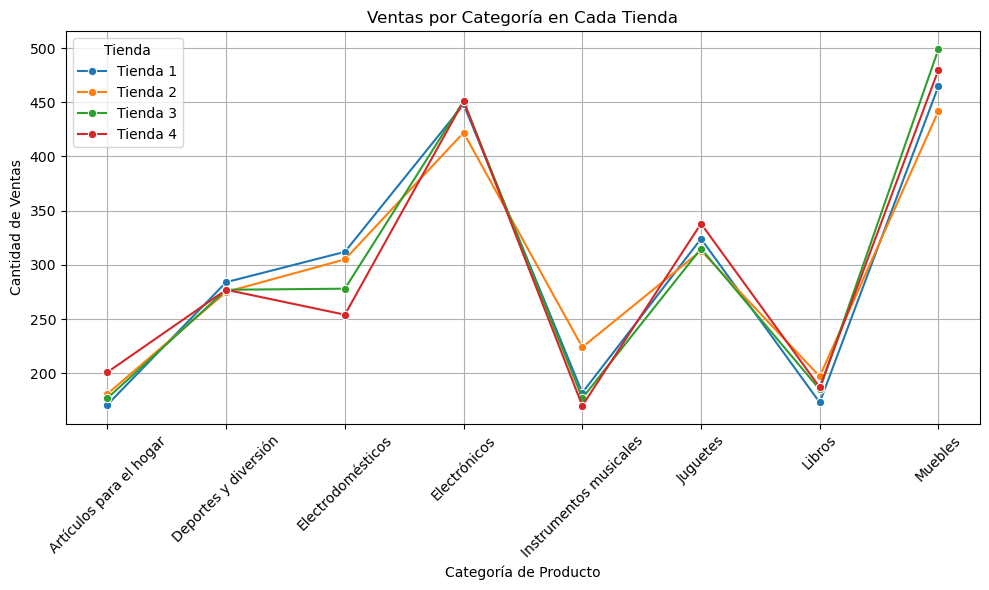

,Categoría del Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Artículos para el hogar,171,181,177,201
1,Deportes y diversión,284,275,277,277
2,Electrodomésticos,312,305,278,254
3,Electrónicos,448,422,451,451
4,Instrumentos musicales,182,224,177,170
5,Juguetes,324,313,315,338
6,Libros,173,197,185,187
7,Muebles,465,442,499,480


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

ventas_tienda_por_categoria = tienda['Categoría del Producto'].value_counts()
ventas_tienda2_por_categoria = tienda2['Categoría del Producto'].value_counts()
ventas_tienda3_por_categoria = tienda3['Categoría del Producto'].value_counts()
ventas_tienda4_por_categoria = tienda4['Categoría del Producto'].value_counts()

df_ventas_tiendas_por_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda_por_categoria,
    'Tienda 2': ventas_tienda2_por_categoria,
    'Tienda 3': ventas_tienda3_por_categoria,
    'Tienda 4': ventas_tienda4_por_categoria
}).fillna(0).astype(int)

df_ventas_tiendas_por_categoria.reset_index(inplace=True)

df_ventas_tiendas_por_categoria.rename(columns={'index': 'Categoría del Producto'}, inplace=True)

df_ventas_tiendas_por_categoria_largo = df_ventas_tiendas_por_categoria.melt(id_vars='Categoría del Producto', var_name='Tienda', value_name='Ventas')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ventas_tiendas_por_categoria_largo, x='Categoría del Producto', y='Ventas', hue='Tienda', marker='o')

plt.title('Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df_ventas_tiendas_por_categoria

### Las categorías donde hubo más ventas para la tienda 1 fueron: Deportes y diversión, y Electrodomésticos
### La categoría donde hubo más ventas para la tienda 2 fueron: Electrónicos
### Las categorías donde hubo más ventas para la tienda 3 fueron: Electrónicos y Muebles
### Las categorías donde hubo más ventas para la tienda 4 fueron: Artículos para el hogar y Juguetes

# 3. Calificación promedio de la tienda


In [13]:
calificacion_promedio_tienda = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

df_calificacion_tiendas = pd.DataFrame(columns=["conteo"],data=[calificacion_promedio_tienda,
                                                calificacion_promedio_tienda2,
                                                calificacion_promedio_tienda3,
                                                calificacion_promedio_tienda4], index=["Tienda 1","Tienda 2","Tienda 3","Tienda 4"])
df_calificacion_tiendas

,conteo
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


### La tienda mejor calificada fue la Tienda 3
### La tienda peor calificada fue la tienda 1

# 4. Productos más y menos vendidos

In [14]:
#dataframe con el producto más vendido para cada tienda y la cantidad vendida
productos_mas_vendidos_tienda1 = tienda['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda2 = tienda2['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda3 = tienda3['Producto'].value_counts().head(3)
productos_mas_vendidos_tienda4 = tienda4['Producto'].value_counts().head(3)

lista_productos_mas_vendidos_tiendas = [productos_mas_vendidos_tienda1,
                                         productos_mas_vendidos_tienda2,
                                         productos_mas_vendidos_tienda3,
                                         productos_mas_vendidos_tienda4]

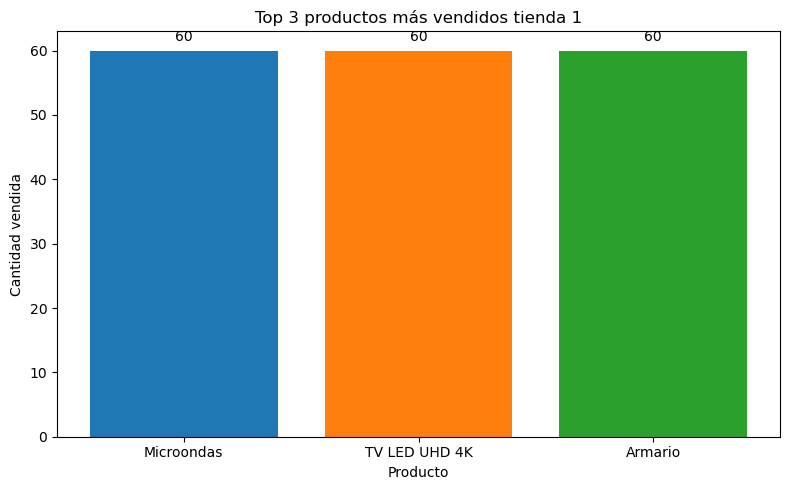

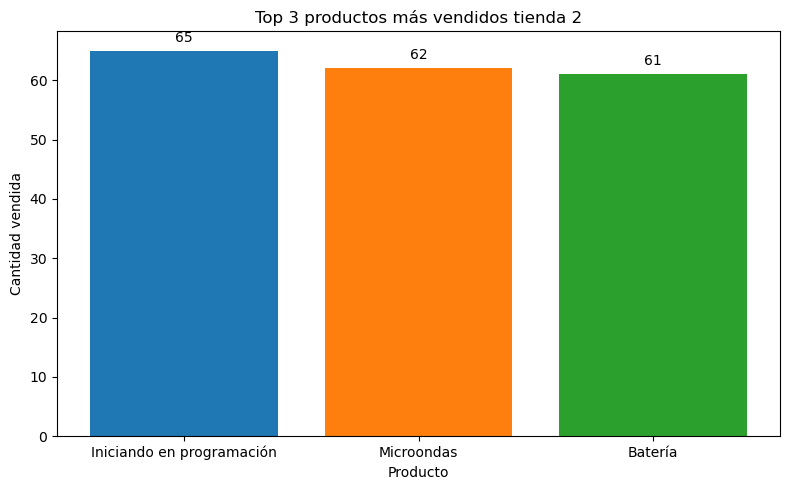

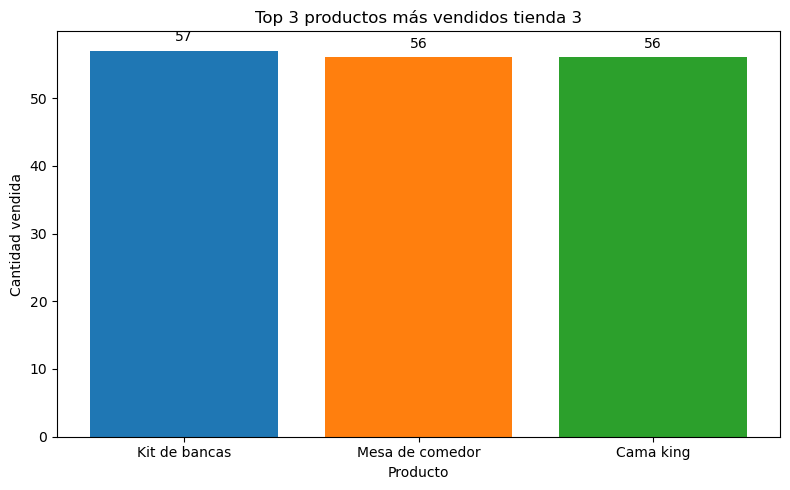

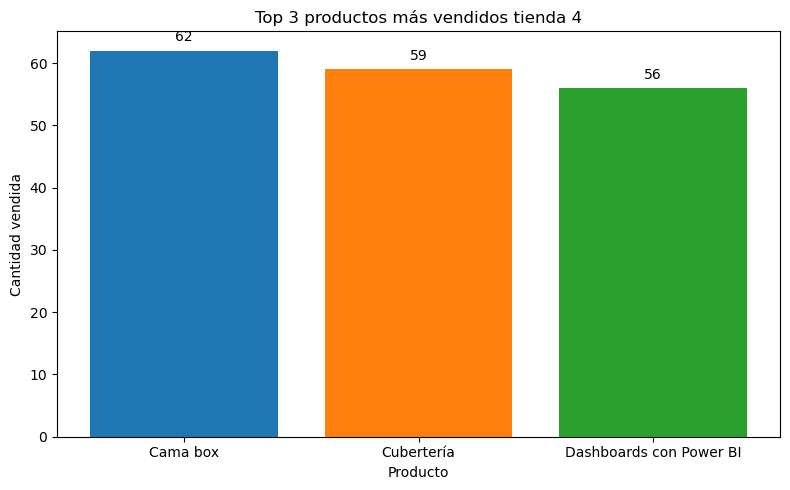

In [15]:
# Crear un gráfico para mostrar 
import matplotlib.pyplot as plt


# Suponiendo que ya tienes tu DataFrame df con la columna 'Producto'

# Obtener el Top 3 productos más vendidos
contador = 1
for i in lista_productos_mas_vendidos_tiendas:
# Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    bars = plt.bar(i.index, i.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Añadir etiquetas sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    # Títulos y etiquetas
    plt.title('Top 3 productos más vendidos tienda ' + str(contador))
    contador += 1
    plt.xlabel('Producto')
    plt.ylabel('Cantidad vendida')
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()




# 5. Envío promedio por tienda

In [57]:
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()
df_costo_envio_tiendas = pd.DataFrame(columns=["costo_envio_promedio"], data=[costo_envio_promedio_tienda1,
                                                costo_envio_promedio_tienda2,
                                                costo_envio_promedio_tienda3,
                                                costo_envio_promedio_tienda4], index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

df_costo_envio_tiendas

,costo_envio_promedio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


### La tienda con el costo de envío promedio más alto es la Tienda 1
### La tienda con el costo de envío promedio más bajo es la Tienda 4

In [69]:

total_productos_mas_vendidos_tienda1 = sum(productos_mas_vendidos_tienda1)
total_productos_mas_vendidos_tienda2 = sum(productos_mas_vendidos_tienda2)
total_productos_mas_vendidos_tienda3 = sum(productos_mas_vendidos_tienda3)
total_productos_mas_vendidos_tienda4 = sum(productos_mas_vendidos_tienda4)
df_cantidad_vendida_mas_vendidos = pd.DataFrame(columns=["Tienda"], data=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

df_cantidad_vendida_mas_vendidos['cantidad_vendida'] = [total_productos_mas_vendidos_tienda1,
                                                         total_productos_mas_vendidos_tienda2,
                                                         total_productos_mas_vendidos_tienda3,
                                                         total_productos_mas_vendidos_tienda4]

df_cantidad_vendida_mas_vendidos['costo_envio_promedio'] = [costo_envio_promedio_tienda1,
                                                         costo_envio_promedio_tienda2,
                                                         costo_envio_promedio_tienda3,
                                                         costo_envio_promedio_tienda4]

df_cantidad_vendida_mas_vendidos['ingresos_totales_tienda'] = [ingresos_totales_tienda,
                                                         ingresos_totales_tienda2,
                                                         ingresos_totales_tienda3,
                                                         ingresos_totales_tienda4]

df_cantidad_vendida_mas_vendidos




,Tienda,cantidad_vendida,costo_envio_promedio,ingresos_totales_tienda
0,Tienda 1,180,26018.609580,1.150880e+09
1,Tienda 2,188,25216.235693,1.116344e+09
2,Tienda 3,169,24805.680373,1.098020e+09
3,Tienda 4,177,23459.457167,1.038376e+09


## En la tabla anterior se puede observar la comparativa entre la cantidad vendida por el top 3 productos más vendidos para cada tienda, el costo promedio por tienda y los ingresos totales de la tienda

# El siguiente gráfico busca comparar la relación que hay entre el costo promedio de envío VS las cantidad de ventas totales de los 3 productos más vendidos para cada tienda

A su vez se muestra el total de ingresos para cada tienda, lo que permite también observar cómo el costo de envío promedio y la cantidad vendida de los 3 mejores productos afecta en los ingresos totales de cada tienda.

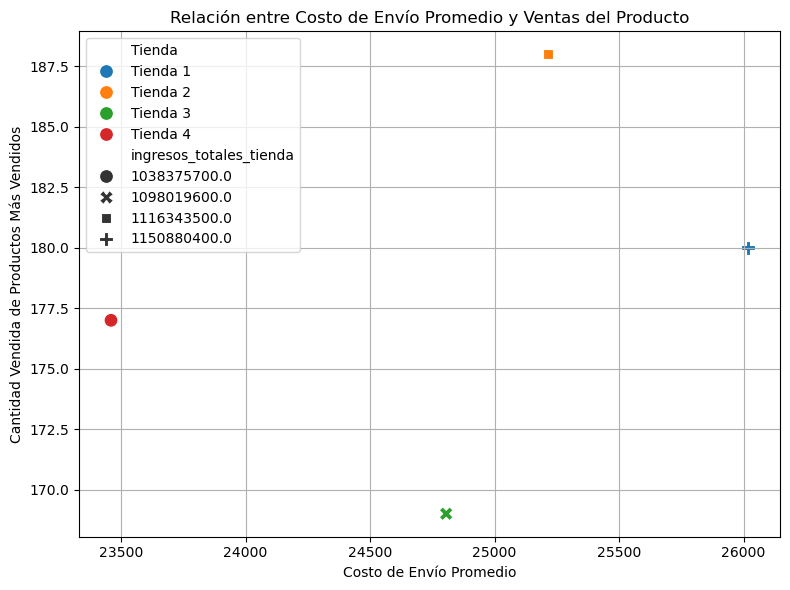

In [72]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cantidad_vendida_mas_vendidos,
    x='costo_envio_promedio',
    y='cantidad_vendida',
    hue='Tienda',
    style="ingresos_totales_tienda",  # para diferenciar por color  
    s=100  # tamaño de los puntos
)

# Ajustes estéticos
plt.title('Relación entre Costo de Envío Promedio y Ventas del Producto')
plt.xlabel('Costo de Envío Promedio')
plt.ylabel('Cantidad Vendida de Productos Más Vendidos')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Introducción

<p style="font-size:16px; line-height:1.6; text-align:justify;">
En el presente informe se expone un análisis comparativo realizado sobre <strong>cuatro tiendas</strong>, utilizando diversos factores cuantitativos y cualitativos extraídos de sus datos. <br><br>

El objetivo principal de este análisis es determinar, con base en evidencia y argumentos sólidos, a cuál de estas tiendas el cliente <strong>Juan</strong> debería vender sus productos. <br><br>

A lo largo del informe se detallarán los criterios evaluados y se justificará la recomendación final de manera clara y sustentada.
</p>



# 📊 Desarrollo del Análisis

<p style="font-size:16px; line-height:1.7; text-align:justify;">

Para identificar cuál tienda representa la mejor opción para que el cliente <strong>Juan</strong> comercialice sus productos, se realizó un análisis multidimensional basado en los siguientes criterios:

<br><br>

✅ <strong>1. Ingresos Totales:</strong>  
La tienda con mayor facturación fue la <strong>Tienda 1</strong>, mientras que la de menor facturación fue la <strong>Tienda 4</strong>. Esto puede reflejar un mayor volumen de ventas o un ticket promedio más alto en la Tienda 1.

<br><br>

✅ <strong>2. Categorías con Mayor Demanda:</strong>  
Cada tienda muestra fortalezas distintas según sus categorías de mayor venta:
<ul>
<li><strong>Tienda 1:</strong> Deportes y diversión, Electrodomésticos</li>
<li><strong>Tienda 2:</strong> Electrónicos</li>
<li><strong>Tienda 3:</strong> Electrónicos y Muebles</li>
<li><strong>Tienda 4:</strong> Artículos para el hogar y Juguetes</li>
</ul>


<br>

✅ <strong>3. Calificación Promedio:</strong>
<br>
La <strong>Tienda 3</strong> presenta la mejor valoración por parte de los clientes, lo que podría asociarse a una mejor experiencia de usuario, atención y logística. En contraste, la <strong>Tienda 1</strong> es la peor calificada. 

Se puede afirmar también que la tienda 1 al tener más ventas por ende tiende a tener más clientes y comparando la diferencia entre las calificaciones al ser tan estrecha es posible que la calificación de la tienda 1 se deba a la mayoría de clientes que atiende.

<br>

✅ <strong>4. Productos Más Vendidos:</strong>  
Se identificaron los tres productos más vendidos por tienda. La cantidad total vendida de estos productos es un indicador del comportamiento del consumidor en cada tienda. En términos de volumen, la <strong>Tienda 3</strong> también destaca por tener productos populares con buena rotación.

<br><br>

✅ <strong>5. Costo de Envío Promedio:</strong>  
Este factor incide directamente en la decisión de compra de los usuarios. La <strong>Tienda 1</strong> tiene el envío más costoso, mientras que la <strong>Tienda 4</strong> presenta el envío más económico. Este aspecto podría afectar la conversión en ventas, especialmente si los productos son de menor precio.

<br><br>

📌 Finalmente, se cruzaron variables como el ingreso total, costo de envío y volumen de productos más vendidos, revelando que:
<ul>
<li><strong>Tienda 3</strong> logra un buen equilibrio entre volumen de ventas, calificación de clientes y desempeño por categoría.</li>
<li><strong>Tienda 2</strong> se posiciona como una tienda especializada en electrónicos, con una buena facturación y un costo de envío intermedio. Sin embargo, su calificación de servicio no destaca, lo que podría afectar la experiencia del comprador.</li>
<li><strong>Tienda 1</strong> tiene alta facturación, pero su bajo puntaje de calificación y costos elevados de envío podrían representar una barrera.</li>
<li><strong>Tienda 4</strong> es accesible en envío, pero su bajo ingreso total y categorías menos populares la hacen menos competitiva.</li>
</ul>

</p>


# ✅ Conclusión

<p style="font-size:16px; line-height:1.7; text-align:justify;">

Tras analizar los factores clave que afectan la decisión de comercialización —como facturación, calificaciones, categorías más vendidas, costos de envío y volumen de productos más populares— se concluye que la <strong>Tienda 3</strong> representa la mejor opción para que el cliente <strong>Juan</strong> venda sus productos.

<br><br>

Esta recomendación se basa en los siguientes argumentos:
<ul>
<li>Cuenta con la <strong>mejor calificación</strong> entre todas las tiendas, lo que sugiere una experiencia de usuario satisfactoria y buena reputación.</li>
<li>Presenta <strong>buen desempeño de ventas</strong> en categorías clave como Electrónicos y Muebles, que podrían alinearse con el portafolio de Juan.</li>
<li>El volumen de productos más vendidos y el ingreso generado son competitivos y muestran un <strong>balance favorable</strong> frente a los costos logísticos.</li>
</ul>

En resumen, la Tienda 3 combina una alta percepción de calidad con resultados comerciales sólidos, lo cual la posiciona como la opción más estratégica para maximizar ventas y posicionamiento de marca para el cliente.

</p>
